EM Algorithm vs K-mean clustering Algorithm

ARPANA M RAMASWAMY - 1BM18CS147

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

Getting Iris Dataset

In [14]:
iris_data = datasets.load_iris()
colors = np.array(['blue', 'red', 'green','yellow'])
data = pd.DataFrame(iris_data.data)
data.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(data.sample(10))
y = pd.DataFrame(iris_data.target)
y.columns = ['Targets']

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
141           6.9          3.1           5.1          2.3
116           6.5          3.0           5.5          1.8
119           6.0          2.2           5.0          1.5
113           5.7          2.5           5.0          2.0
8             4.4          2.9           1.4          0.2
51            6.4          3.2           4.5          1.5
98            5.1          2.5           3.0          1.1
109           7.2          3.6           6.1          2.5
78            6.0          2.9           4.5          1.5
108           6.7          2.5           5.8          1.8


EM Algorithm

In [ ]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(data)
x = Scaler.transform(data)
x2 = pd.DataFrame(x, columns = data.columns)
print(x2.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(x2)

y2 = gmm.predict(x2)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(data.Petal_Length, data.Petal_Width, c=colors[y2], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y2))

K Means Clustering Algorithm

The accuracy score of K-Mean:  0.24


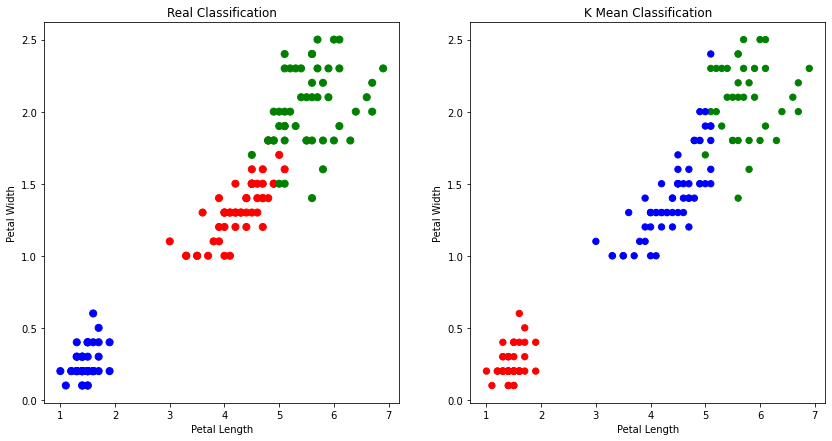

In [12]:
model = KMeans(n_clusters=3)
model.fit(data)
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.scatter(data.Petal_Length, data.Petal_Width, c=colors[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(data.Petal_Length, data.Petal_Width, c=colors[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))